# Writing Computational Essays Based On Simulation Models

## How to use Jupyter and Python to rapidly build interactive stories based on System Dynamics simulations

**If you want to use the insights gained from simulation models to transform your enterprise, just having the model and the insights alone are often not enough – you need to develop a good story that persuades your stakeholders to make decisions and take action.**

**Our BPTK_PY library allows you to convert System Dynamics models into Python code and run them in the powerful Jupyter notebook environment, which is a wonderful place for writing interactive, data-driven papers and reports.**

In our post [Telling Stories with System Dynamics Models](https://www.transentis.com/telling-stories-with-system-dynamics-models/) we introduced our approach to telling interactive stories based on simulation models built using System Dynamics.

Writing such interactive stories is quite challenging, even if your simulation model is already fairly complete, because you need to craft the storyline while testing different scenarios with the simulation model.

We realised early on that what we needed a "interactive writing environment" that would help us to prototype a complex story line while still building the model:

* Build an initial simulation model using a visual modeling tool.
* Start writing a story around the model using the interactive writing environment.
* Use the new questions and insights that arise during the writing process to drive experiments with the simulation model – this may lead to changes in both the model and the storyline.

In 2014 we started writing such "computational essays" using [Wolfram Research'](http://www.wolfram.com) Mathematica®. 

Mathematica is a wonderful and very powerful tool to support this process – it is a complete environment that supports writing, computation, presentation and very sophisticated interactive dashboards.

Mathematica does not contain native support for System Dynamics, but we crafted a small library that allows us to import System Dynamics models based on the XMILE standard and to run them in Mathematica (see this [blog post](https://www.transentis.com/building-interactive-stories-from-simulation-models/) for details on that).

But since 2014 a lot has happened in the world of computational modelling ... Python has become the premiere programming language for data science and its use has thus become even more ubiquitous, and with it the [Jupyter](http://www.jupyter.org) notebook environment (using the IPython kernel).

Both Mathematica and Jupyter are fantastic environments for creating computational essays and "story-driven simulations":

* Working with Mathematica and the Wolfram Language is incredibly productive thanks to the symbolic nature of the language and the way it integrates into the highly sophisticated Mathematica notebook environment.
* Currently Jupyter notebooks still lack the sophistication of Mathematica notebooks. But what sets the Jupyter/IPython ecosystem appart is that it is open source (and thus free to use for everyone), highly extensible and very widely used in the data science/computational modeling community - it is thus much easier to find books, training materials and skilled resources.

>For a more in-depth comparison of Jupyter and Mathematica see Paul Romer's very interesting [blog post](https://paulromer.net/jupyter-mathematica-and-the-future-of-the-research-paper/) on this topic. Also be sure to read the [Atlantic Article](https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/) referenced by Paul Romer.

Because Jupyter and Python are free to use, we decided to port our Business Prototyping Toolkit to the Jupyer/Python universe  and also provide it free of charge - which means you can now create simulation models using System Dynamics and let them run in Python.

Our approach is very powerful and liberating, because it turns our models into computable objects – we can now use our simulation models in new ways, quite independently of the modeling environment in which we create the model.

Some "everyday" examples of such uses are:

* Writing up a report (or paper) based on a System Dynamics model using Jupyter and plotting all related graphs directly in Jupyter. 
* Creating and managing a comprehensive set of scenarios pertaining to that model.
* Creating an interactive dashboard for a model.
* Sharing models, dashboards and reports with people who do not have access to the original model environment.
* Comparing multiple versions of a model to each other.

We provide examples for all these points later in this document.

More advanced examples for using models as computable objects are:

* creating interactive games (see our version of the [Beergame](https://www.transentis.com/understanding-the-beer-game) and the computational essay that goes with it. We built the model underlying the game using System Dynamics and transpiled the model into Javascript using our Javascript transpiler),
* performing monte-carlo sensitivity analysis of a model on multiple machines in parallel, using state-of-the art, scalable parallel processing engines such as [Apache Spark](http://spark.apache.org)
* training machine learning algorithms using System Dynamics models.
* combining system dynamics models with other computational model techniques, such as agent based modeling.


We are providing the BPTK PY framework as a closed source framework under the [MIT license](https://en.wikipedia.org/wiki/MIT_License), which means you are free to use the framework in your own modeling projects. You can download the Jupyter Notebook and System Dynamics model corresponding to this blog post along with installation instructions and a more detailed tutorial in our [member area](https://www.transentis.com/member-area/) - please sign up to the member area first if you do not have an account yet.

To demonstrate our computational essay approach using our BPTK PY framework we will use a very simple System Dynamics model. The System Dynamics model itself was built using the dynamic modeling and simulation software Stella® from [iseesystems](http://www.iseesystems.com).

Stella saves models using the [XMILE format](https://www.oasis-open.org/committees/tc_home.php?wg_abbrev=xmile), which is an open XML protocol for sharing interoperable system dynamics models and simulations. The XMILE standard is governed by the OASIS standards consortium - our framework currently only supports XMILE, we may create a compiler for other formats (such as Vensim® by [Ventana Systems](http://www.vensim.com)) in the future ([send us an email](mailto:support@transentis.com) if you are interested in this).

To illustrate how our framework works, this post uses the model from our [Step-By-Step Introduction To System Dynamics](https://www.transentis.com/step-by-step-tutorials/introduction-to-system-dynamics/).

We've included the stock and flow diagram of the entire model below â€“ you don't need to understand how the model works to follow this post, but knowing the stock and flow structure will be useful.

![Simple Project Management Model](images/intro/simple_project_diagram.png)

The following sections illustrated various aspects of our framework and of how to use it.

* [Importing the BPTK_Py Framework](#Importing-The-Framework)
* [Setting up Scenarios and Scenario Managers](#Setting-up-Scenarios-and-Scenario-Managers)
* [Plotting Scenario Results](#Plotting-Scenario-Results)
* [Creating Interactive Simulation Dashboards](#Creating-Interactive-Simulation-Dashboards)
* [Accessing The Underlying System Dynamics Model](#Accessing-the-Underlying-System-Dynamics-Model)
* [Accessing Model Information](#Accessing-Model-Information)
* [Checking and Comparing Models](#Checking-and-Comparing-Models)

### Importing The Framework

The Business Prototyping Toolkit for Python comes with a model transpiler, which automatically converts SD-models created with [Stella](http://www.iseesystems.com) into Python Code, a model simulator which let's you run those models in a Python environment (such as a Jupyter notebook), a simple format for defining scenarios, and some methods to plot simulation results - these methods form the BPTK API.

For most users, this will be enough initialy: you create the model using Stella and experiment with it by defining scenarios and plotting graphs in Jupyter notebooks. Whenever you change the model in Stella, the model is automatically transpiled to Python in a background process. Hence you can work on your model (in Stella) and write your computational essay (in Jupyter) in parallel.

You only need very limited Python skills to do this – the following sections show all the code that is needed to get up and running, our downloadable tutorial provides detailed installation instructions. we have found that even modelers who are new to Jupyter and Python can get productive with our toolkit within a few hours.

More advanced users can use the full power of Jupyter and Python to access and manipulate the underlying simulation model and simulation results.

>For those of you that are new to Jupyter: Please run the code cells by pushing ``Shift + Enter``. The next code cell imports the BPTK_Py package and initializes it. This may take some time during the first run, because some necessary libraries will be downloaded from the [NPM repository](http://www.npmjs.org). 

In [1]:
## BPTK Package
from BPTK_Py.bptk import bptk 

bptk = bptk()

### Setting up Scenarios and Scenario Managers

Scenarios are just particular settings for the constants and graphical functions in your model and scenario managers are a simple way of grouping scenarios.

You can create scenarios directly in Python, but the easiest way to maintain them is to keep them in separate files – you can define as many scenario managers and scenarios in a file as you would like and use as many files as you would like. Each scenario manager references the model it pertains to. So you can run multiple simulation models in one notebook.

All the scenario definition files are kept in the ``scenarios/`` folder. The BPTK_Py framework will automatically scan this folder and load the scenarios – including the underlying simulation models – into memory.

The following code lists all available scenario managers and scenarios:

In [2]:
print("Available Scenario Managers and Scenarios:")

managers = bptk.scenario_manager_factory.get_scenario_managers(scenario_managers_to_filter=[])

for key, manager in managers.items():
     print("")
     print("*** {} ***".format(key))

     for name in manager.get_scenario_names():
         print("\t {}".format(name))

Available Scenario Managers and Scenarios:

*** smSimpleProjectManagementDslClass ***
	 scenario100_strategy
	 scenario100
	 scenario80
	 scenario120

*** ABMsmSimpleProjectManagement ***
	 scenario80
	 scenario100
	 scenario120
	 scenario80DT1
	 scenario100SM2D50
	 scenario100SM2D90

*** anotherSimpleProjectManagement ***
	 scenario100
	 scenario80
	 scenario120

*** smSimpleProjectManagement ***
	 base
	 scenario100
	 scenario80
	 scenario120
	 scenario100WithPoints

*** smInteractive ***
	 scenario100

*** smSimpleProjectManagementV0 ***
	 base
	 scenario100
	 scenario80
	 scenario120

*** ABMsmBass ***
	 scenarioBassBase


As the filename suggests, scenarios are defined using the [JSON format](http://www.json.org):
```
"smSimpleProjectManagement":{
    "source":"simulation_models/sd_simple_project.itmx",
    "model":"simulation_models/sd_simple_project",
    "scenarios":{
      "scenario100":{
        "constants": {
          "deadline": 100,
          "effortPerTask": 1,
          "initialOpenTasks": 100,
          "initialStaff": 1
        }
      }
    }
  }
  ```

The outer bracket  defines the scenario manager. Next to containing a number of scenarios, the scenario manager also defines which model the scenarios apply to (the `source` field and also the `model` file which contains the model's transpiled Python code.

Each scenario gets a name (`scenario100` in this example) and a list of constants which define the scenario settings.

We can also take a look at how the scenario is stored in our Python Scenario Manager:

In [2]:
bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario100").dictionary

{'initialOpenTasks': 100,
 'constants': {'deadline': 100,
  'effortPerTask': 1,
  'initialOpenTasks': 100,
  'initialStaff': 1},
 'points': {'productivity': [[0, 0.4],
   [0.25, 0.444],
   [0.5, 0.506],
   [0.75, 0.594],
   [1, 1],
   [1.25, 1.119],
   [1.5, 1.1625],
   [1.75, 1.2125],
   [2, 1.2375],
   [2.25, 1.245],
   [2.5, 1.25]]}}

The only difference in `scenario80` is that we have set the number of initial open tasks to 80 instead of 100.

In [3]:
bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario80").dictionary

{'constants': {'initialOpenTasks': 80,
  'deadline': 100,
  'effortPerTask': 1,
  'initialStaff': 1},
 'points': {'productivity': [[0, 0.4],
   [0.25, 0.444],
   [0.5, 0.506],
   [0.75, 0.594],
   [1, 1],
   [1.25, 1.119],
   [1.5, 1.1625],
   [1.75, 1.2125],
   [2, 1.2375],
   [2.25, 1.245],
   [2.5, 1.25]]}}

### Plotting Scenario Results
#### Example 1: Multiple Equations for one scenario
Let's assume that we would like to plot multiple equations for the same scenario.

All plotting is done using the ``bptk.plot_cenarios`` method. We just need to pass the name of the scenario ('scenario100') and the list of equations ('openTasks' and 'closedTasks').

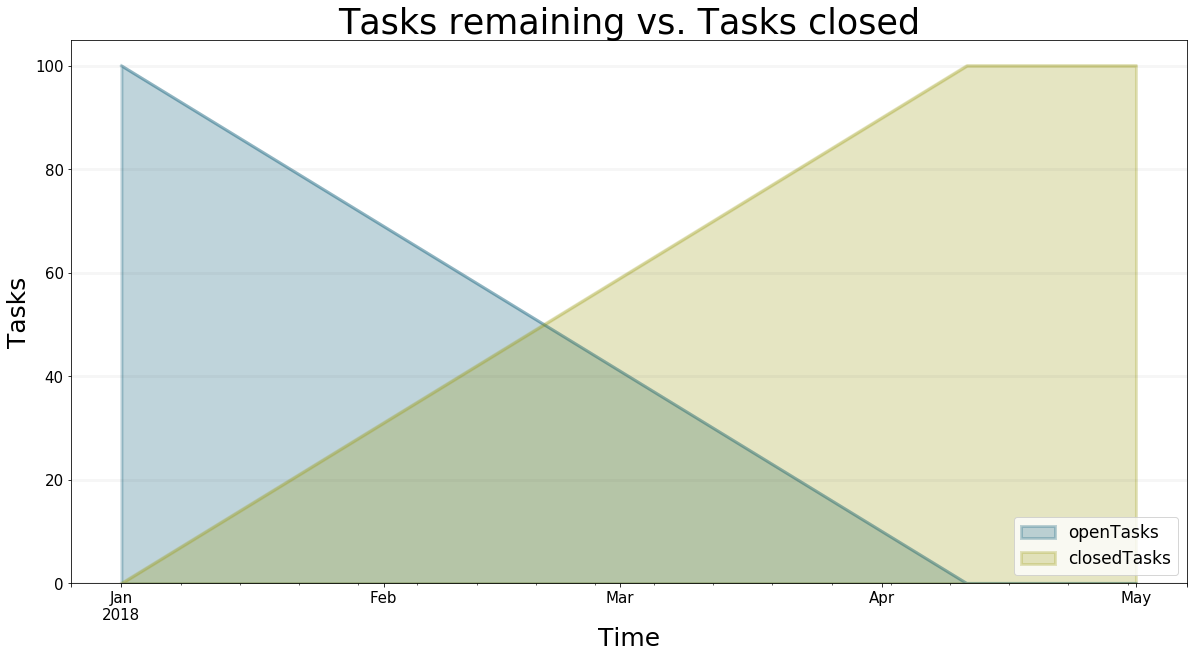

In [4]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario100"], 
    equations=['openTasks','closedTasks'],
    title="Tasks remaining vs. Tasks closed",
    freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Tasks"
)

As you can see we can easly change the name of the diagram, the axes labels and the time scale. A legend showing the names of the plotted equations is displayed automatically. The colors for the plots are set in a configuration file - you can learn more about how to do this in the advanced documentation contained in our tutorial.

#### Renaming the series
The equation names (such as `openTasks`) are often not the kind of names you want to show to the reader – in this case for instance we would much rather use the phrase `Open Tasks`.

Fortunately we can use the ``series_name`` parameter to rename them. 

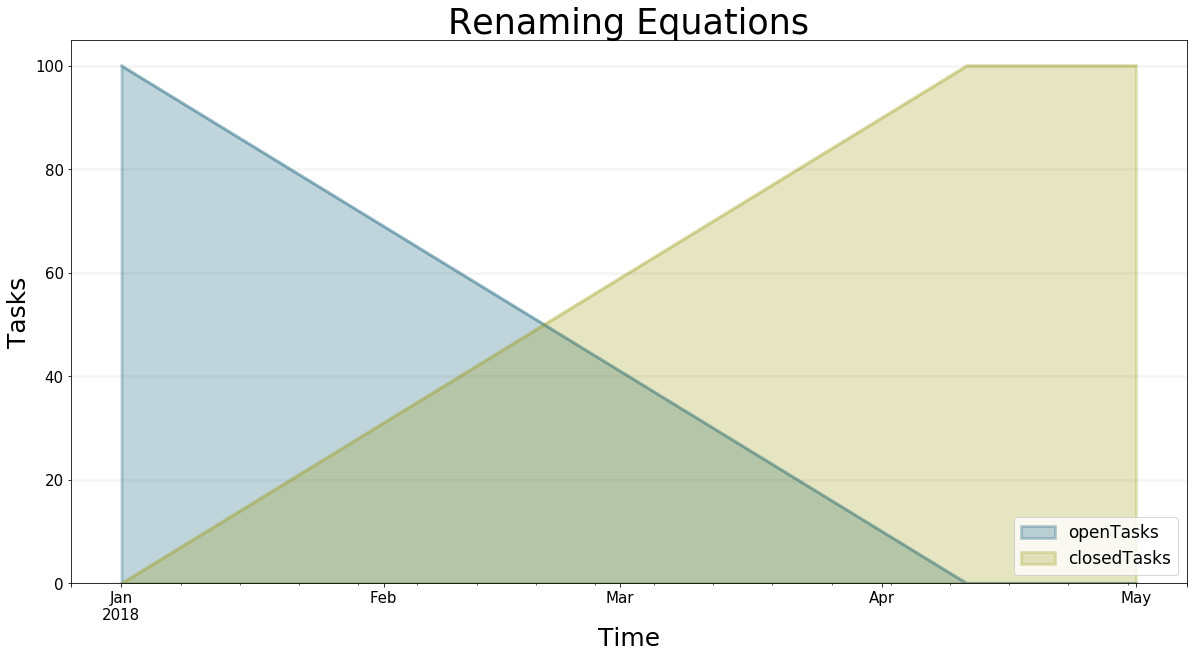

In [5]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario100"], 
    equations=['openTasks','closedTasks'],
    title="Renaming Equations",
     freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Tasks",
    series_names={"openTasks" : "Open Tasks","closedTasks" : "Closed Tasks"}
)

#### Example 2: Plot one equation for multiple scenarios
Now let us change the perspective. In the above example we assumed one scenario for which we simulate multiple equations. Now we simulate **one equation for multiple scenarios**. This is useful whenever we want to compare the behaviour of the same model element between different scenarios.

To achieve this, we supply just one equation and a list of scenarios to the `plot_scenarios` method.

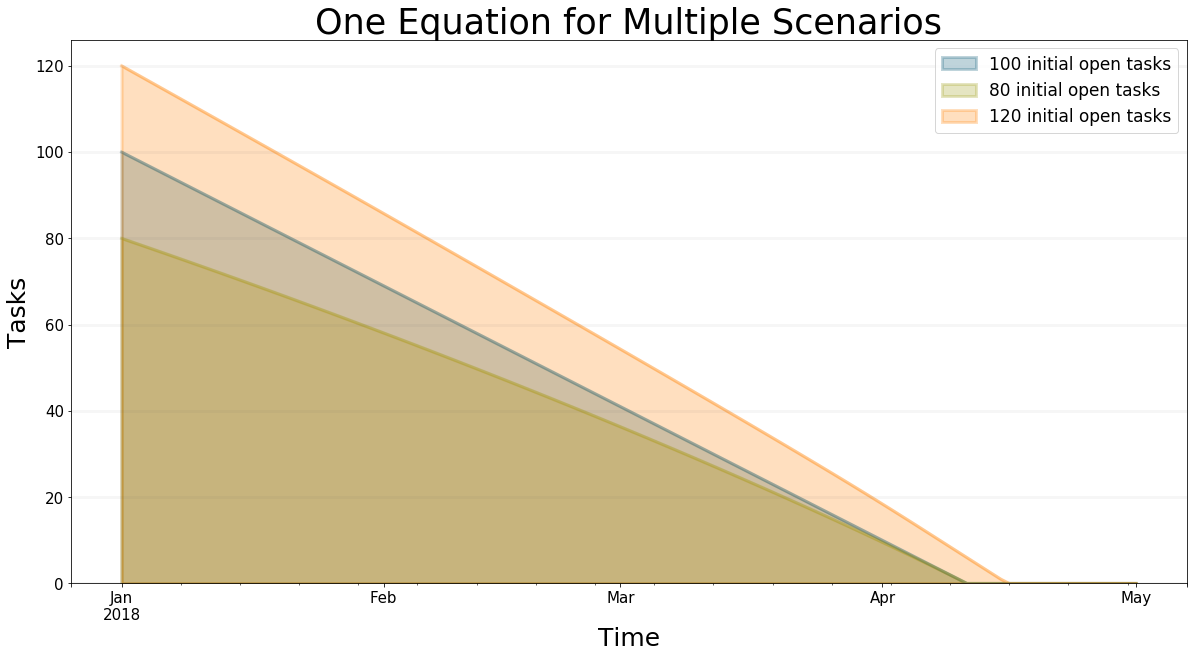

In [6]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario80","scenario100","scenario120"],
    equations=["openTasks"],
    title="One Equation for Multiple Scenarios",
     freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Tasks",
    series_names={
        "smSimpleProjectManagement_scenario80_openTasks":"80 initial open tasks",
        "smSimpleProjectManagement_scenario100_openTasks":"100 initial open tasks",
        "smSimpleProjectManagement_scenario120_openTasks":"120 initial open tasks"
    }
)

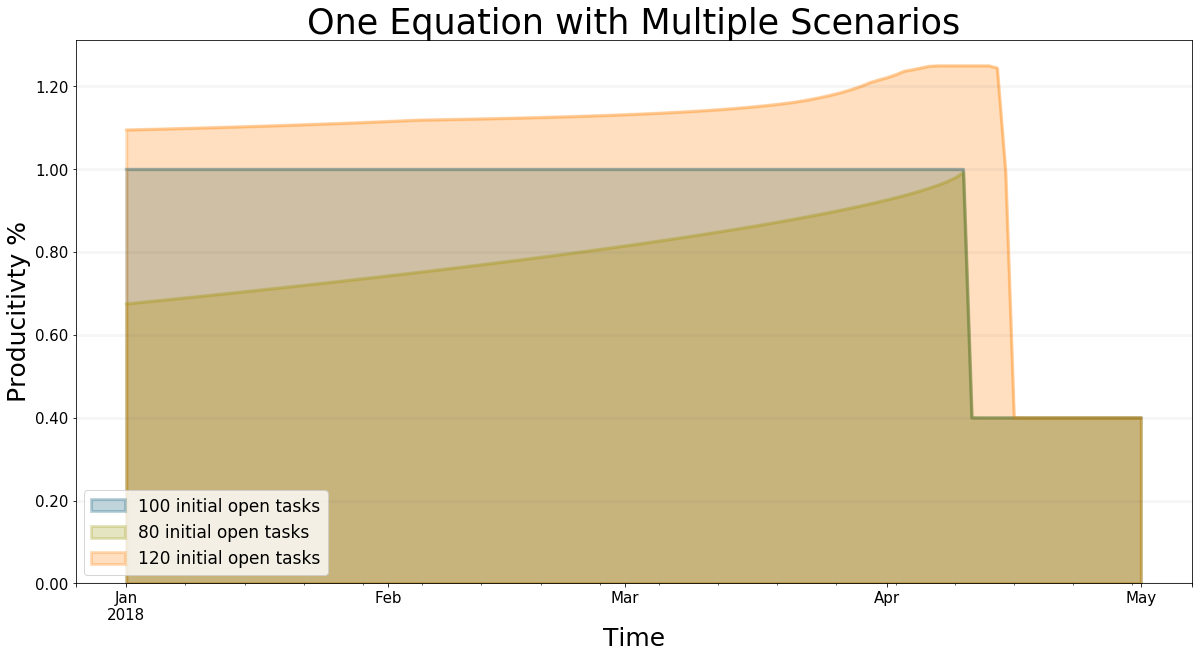

In [7]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios="scenario80,scenario100,scenario120",
    equations="productivity",
    title="One Equation with Multiple Scenarios",
     freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Producitivty %",
    series_names={
        "smSimpleProjectManagement_scenario80_productivity":"80 initial open tasks",
        "smSimpleProjectManagement_scenario100_productivity":"100 initial open tasks",
        "smSimpleProjectManagement_scenario120_productivity":"120 initial open tasks"
    }
)

#### What if I want another kind of graph?

The default output format for our plots shows each plot with a shaded area. This can easly be changed using the``kind`` parameter. Currently we also support the `line` and `stacked` setting.


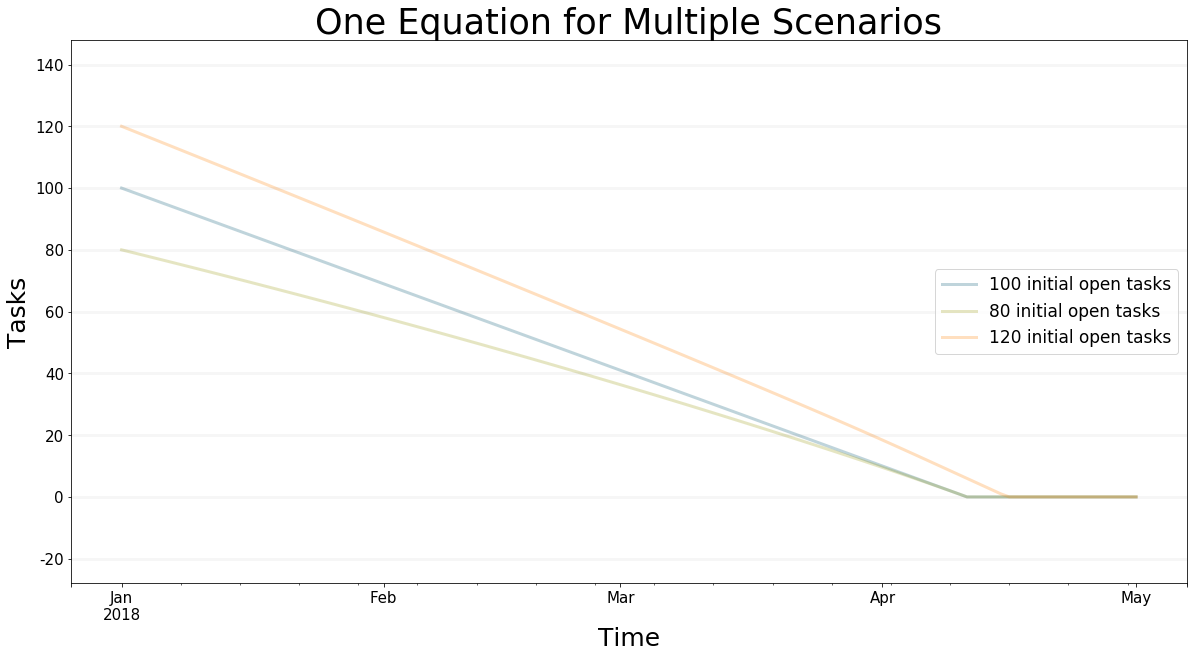

In [8]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios="scenario80,scenario100,scenario120",
    equations="openTasks",
    kind="line",
    title="One Equation for Multiple Scenarios",
     freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Tasks",
    series_names={
        "smSimpleProjectManagement_scenario80_openTasks":"80 initial open tasks",
        "smSimpleProjectManagement_scenario100_openTasks":"100 initial open tasks",
        "smSimpleProjectManagement_scenario120_openTasks":"120 initial open tasks"}
)

#### What if I need the underlying data?

Sometimes you may not be interested in plotting a graph but would rather use the underlying data directly. This is easy – you can use use the `return_df=True` setting to return a dataframe containing all of the data in the scenario. The dataframe is provided as a [Pandas](http://pandas.pydata.org/) dataframe.

In [9]:
data=bptk.plot_scenarios(
        scenario_managers=["smSimpleProjectManagement"],
        scenarios=["scenario80"],
         freq="D",
        start_date="1/1/2018",
        equations=["openTasks","closedTasks","completionRate","remainingTime","schedulePressure","productivity"],
        return_df=True
)

The dataframe is a table with a row for each day and a column for each of the scenarios. Using the `pandas.DataFrame.head` function we can show the first five rows of the dataframe:

In [10]:
data.head()

,openTasks,closedTasks,completionRate,remainingTime,schedulePressure,productivity
2018-01-01,80.000000,0.000000,0.675200,100,0.800000,0.675200
2018-01-02,79.324800,0.675200,0.677247,99,0.801261,0.677247
2018-01-03,78.647553,1.352447,0.679302,98,0.802526,0.679302
2018-01-04,77.968250,2.031750,0.681365,97,0.803796,0.681365
2018-01-05,77.286885,2.713115,0.683436,96,0.805072,0.683436


Once you have the dataframe, you can use the full power of `Python` and the `pandas` library to access the data, e.g. the `iloc`indexer to access a particular row.

In [11]:
data.iloc[4]

openTasks           77.286885
closedTasks          2.713115
completionRate       0.683436
remainingTime       96.000000
schedulePressure     0.805072
productivity         0.683436
Name: 2018-01-05 00:00:00, dtype: float64

### Creating Interactive Simulation Dashboards

Jupyer notebooks aren't just a great environment for interactive writing and plotting, they also allow you to build interactive user interfaces. 

In [12]:
bptk.dashboard(
    scenario_managers=["smInteractive"],
    scenarios=["scenario100"],
    kind="area",
    equations=["openTasks"],
    series_names={"openTasks":"Open Tasks"},
    freq="D",
    start_date="",
    title="Interactive Simulation Dashboard",
    x_label="Date",
    y_label="€",
    constants=[("slider",'initialOpenTasks',50.0,100.0),("slider","deadline",0,150),("timerange")]
    )

interactive(children=(FloatSlider(value=50.0, continuous_update=False, description='initialOpenTasks', layout=…

This generates an interactive dashboard in the Jupyter Notebook that looks like this:

![Interactive Dashboard](images/intro/btpk_tutorial_dashboard.png)

You can also use the generated model to build an analytical web app - here is an [example](https://prototypes.transentis.com/pm_sd) based in the Simple Project Management Framework, built using the [Dash framework](https://plot.ly/products/dash/).

### Accessing The Underlying System Dynamics Model

The underlying System Dynamics model is automatically converted from the XMILE format into Python code – currently our transpiler only supports conversion of models in XMILE format, but we are planning to create a compiler for models in other formats.

We keep both the Stella/XMILE models and the compiled models in the `/MODELS` directory.

The actual equations underlying the simulation are stored in a dictonary of Python lambda functions within the class, e.g. here are the equations for closed tasks, open tasks and the completion rate:

```

'closedTasks': lambda t : 0 if  t  <=  self.starttime  else self.memoize('closedTasks',t-self.dt)
            +  self.dt  * ( self.memoize('completionRate',t-self.dt) ),

'openTasks': lambda t : self.memoize('initialOpenTasks', t) if  t  <=  self.starttime  else
                self.memoize('openTasks',t-self.dt) +  
                self.dt  * ( -1 * ( self.memoize('completionRate',t-self.dt) ) ),

'staff': lambda t : self.memoize('initialStaff', t) if  t  <=  self.starttime
        else self.memoize('staff',t-self.dt)
        +  self.dt  * 0, 

'completionRate': lambda t : max( 0, min( self.memoize('openTasks', t), self.memoize('staff', t) * 
                self.memoize('productivity', t) / self.memoize('effortPerTask', t) ) ),
  
```

Because of the recursive nature of System Dynamics equations we use memoization to remember previous values – this makes the equations more cumbersome to read (and write should you want to create your own), but it dramatically speeds up calculations.

You can easily access (and change) these lambda functions if you want to, they are stored in a dictionary within the model, which itself is associated with the scenario. Assocating the model with the scenario is essential because it ensure that the scenario settings are automatically applied to the model.

In [13]:
bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario80").model.equations

{'closedTasks': <function simulation_models.sd_simple_project.simulation_model.__init__.<locals>.<lambda>(t)>,
 'openTasks': <function simulation_models.sd_simple_project.simulation_model.__init__.<locals>.<lambda>(t)>,
 'staff': <function simulation_models.sd_simple_project.simulation_model.__init__.<locals>.<lambda>(t)>,
 'completionRate': <function simulation_models.sd_simple_project.simulation_model.__init__.<locals>.<lambda>(t)>,
 'currentDate': <function simulation_models.sd_simple_project.simulation_model.__init__.<locals>.<lambda>(t)>,
 'remainingTime': <function simulation_models.sd_simple_project.simulation_model.__init__.<locals>.<lambda>(t)>,
 'schedulePressure': <function simulation_models.sd_simple_project.simulation_model.__init__.<locals>.<lambda>(t)>,
 'productivity': <function simulation_models.sd_simple_project.simulation_model.__init__.<locals>.<lambda>(t)>,
 'deadline': <function BPTK_Py.sdsimulator.model_simulator.Simulator.change_equation.<locals>.<lambda>(t)>,
 

You can run these equations and access individual values:

In [14]:
bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario100").model.equations["closedTasks"](10)

10.0

If you want to build complete models directly in Python, we recommend using the domain-specific language for SD, which we created especially for this purpose. This DSL is also part of BPTK_PY, you can read more about it in the [BPTK_PY_SD_DSL](bptk_py_sd_dsl_intro.ipynb) notebook.

### Accessing Model Information

Having the model in a python class is useful for other purposes too â€“ for instance you can access the list of stocks, flows and converters to check which elements are in your model:

In [15]:
bptk.scenario_manager_factory.get_scenarios()["smSimpleProjectManagement_scenario100"].model.stocks

['closedTasks', 'openTasks', 'staff']

In [16]:
bptk.scenario_manager_factory.get_scenarios()["smSimpleProjectManagement_scenario100"].model.constants

['deadline', 'effortPerTask', 'initialOpenTasks', 'initialStaff']

Of course we can then use the power of Jupyter to pretty print this using HTML:

In [17]:
from functools import reduce
from IPython.display import HTML
HTML("<ul><li>"+
     reduce(lambda x, y: x+"</li><li>"+y, bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario100").model.stocks)
     +"</li></ul>")

We can also easily output the settings for the constants in the model (for any of the defined scenarios)

In [18]:
for constant in bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario100").model.constants:
    print (constant+": "+str(bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario100").model.equations[constant](0)))

deadline: 100
effortPerTask: 1
initialOpenTasks: 100
initialStaff: 1


In [19]:
for constant in bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario80").model.constants:
    print (constant+": "+str(bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario80").model.equations[constant](0)))

deadline: 100
effortPerTask: 1
initialOpenTasks: 80
initialStaff: 1


#### Checking and Comparing Models

Simulation models can become very large and they often are often in use over many years. This means that you end up having many versions of a model, and it often become difficult to ensure that model versions are consistent or that changes to a later model don't invalidate results obtained earlier.

Thanks to the BPTK framework, models are now computable and we can easily create checks to ensure that models behave as we expect:

In [20]:
bptk.model_check(data=bptk.plot_scenarios(
    scenario_managers="smSimpleProjectManagement",
    scenarios="scenario100",
    equations='openTasks',
    return_df=True
),check=(lambda data: data.iloc[-1,-1]>10),message="Model not behaving as expected")            

[ERROR] Model Checking failed with message: "Model not behaving as expected"


The `bptk.model_check` is very simple - it expects some data and a check function which takes the data as input and returns true or false depending on whether the data passses the check or not.

In this example we used the dataframe return from a scenario to provide the data and a Python lambda function to check whether the number of `openTasks` is greater than 10 in the last timestep. It isn't, and hence an error is generated.

But in this case the model is actually correct but the check function is wrong - if we correct this the `model_check` function returns with a success message:

In [21]:
bptk.model_check(data=bptk.plot_scenarios(
    scenario_managers="smSimpleProjectManagement",
    scenarios="scenario100",
    equations='openTasks',
    return_df=True
),check=(lambda data: data.iloc[-1,-1]<10),message="Model not behaving as expected")            

[SUCCESS] Model check successful!


We can also easily compare two different versions of a model to each other - for instance let's assume we have two versions of our project management model, which say contain different settings for the graphical function we use to model the effect of schedule pressure on productivity and also the number of inital open tasks (as defined in the underlying model, not in the scenarios).

Let's compare the results between the models:

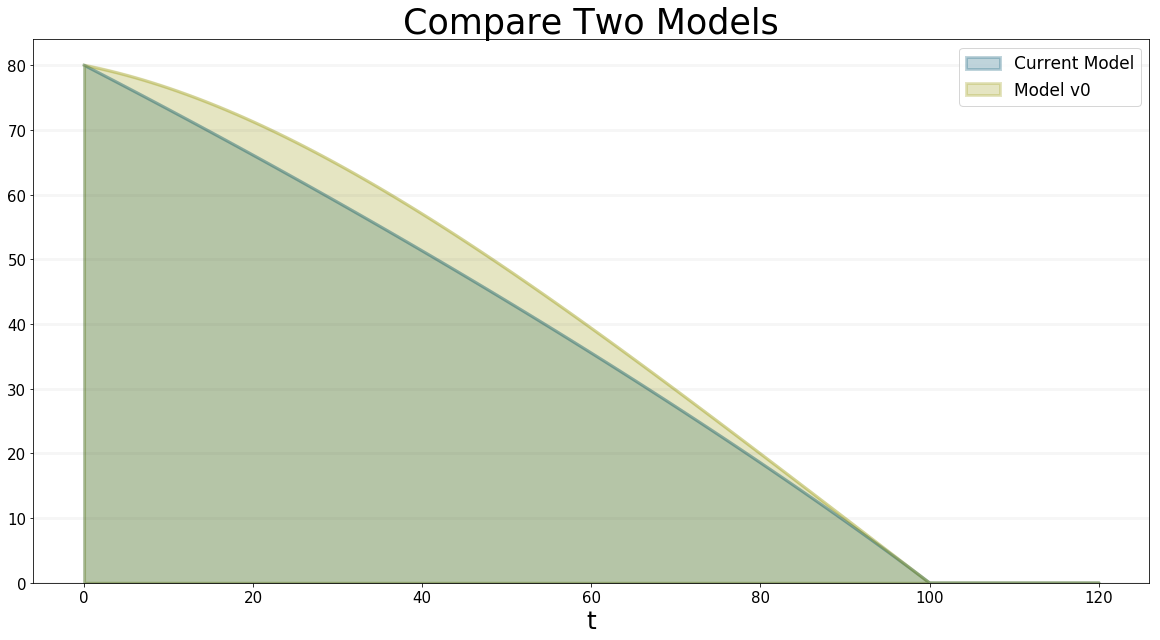

In [22]:
bptk.plot_scenarios(scenario_managers="smSimpleProjectManagement,smSimpleProjectManagementV0",
    scenarios="scenario80",
    equations='openTasks',
    title="Compare Two Models",
    series_names={"smSimpleProjectManagement_scenario80_openTasks":"Current Model","smSimpleProjectManagementV0_scenario80_openTasks":"Model v0"}
)

We can also create some code that automatically lists all of the model elements that have changed between the two models:

In [23]:
for constant in bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","base").model.constants:
    if constant in bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagementV0","base").model.equations:
        if bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","base").model.equations[constant](1)!=bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagementV0","base").model.equations[constant](1):
            print (constant+" , Current Model:"+str(bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","base").model.equations[constant](1))+" , Model v0: "+str(bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagementV0","base").model.equations[constant](1)))
        else:
            print(constant+ " has same value in both models")
    else:
        print (constant +" missing in Model v0")

deadline has same value in both models
effortPerTask has same value in both models
initialOpenTasks , Current Model:100 , Model v0: 110
initialStaff has same value in both models


Note that this last function isn't part of the BPTK framework, but it uses a number of methods provided by the framework â€¦ this shows the real power of making models computable: because you can manipulate models using code, you can easily create your own functions to use your models in any way you want.

## Conclusion

This post detailed our approach to building interactive stories based on simulation models using Jupyter, Python and the BPTK_PY framewor. Here are the important points you should remember:

* If you want to use the insights gained from simulation models to have an impact in the real world, just having the model and the insights is often not enough – you need to develop a good story that persuades your stakeholders to make decisions and take action.
* Jupyter and Python provide a great environment for rapidly building such interactive stories that rely on data and on simulations. Using the BPTK_PY framework, creating such documents is actually quite easy. You can concentrate on the story and let the framework do the heavy lifting.
* Building complex simulations using System Dynamics is best done using visual modeling environments such as Stella. Thanks to the XMILE standard and our BPTK PY framework, we can import System Dynamics models created with Stella straight into Jupyter and run them there.
* Once you have finished the interactive story you can publish it to a wide audience by sharing the Jupyter notebook - this is made particularly easy because Jupyter, Python and BPTK_PY are free.

To see interactive stories and games written using this approach, take a look at our blog posts on [Prototyping Business Models and Market Strategies](https://www.transentis.com/current-topics/prototyping-business-models-market-strategies/), on [Growth Strategies in Professional Service Firms](https://www.transentis.com/industries/transforming-professional-services/) or the [Beergame](https://www.transentis.com/understanding-the-beer-game/).